# Lab 7: Regression Models

#### Experiment with different regularization parameters. Implement Logistic Regression for classification tasks.

In [1]:
# importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the Boston Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Alpha: 0, MSE: 0.56
Alpha: 0.1, MSE: 0.56
Alpha: 1, MSE: 0.56
Alpha: 10, MSE: 0.56
Alpha: 100, MSE: 0.55


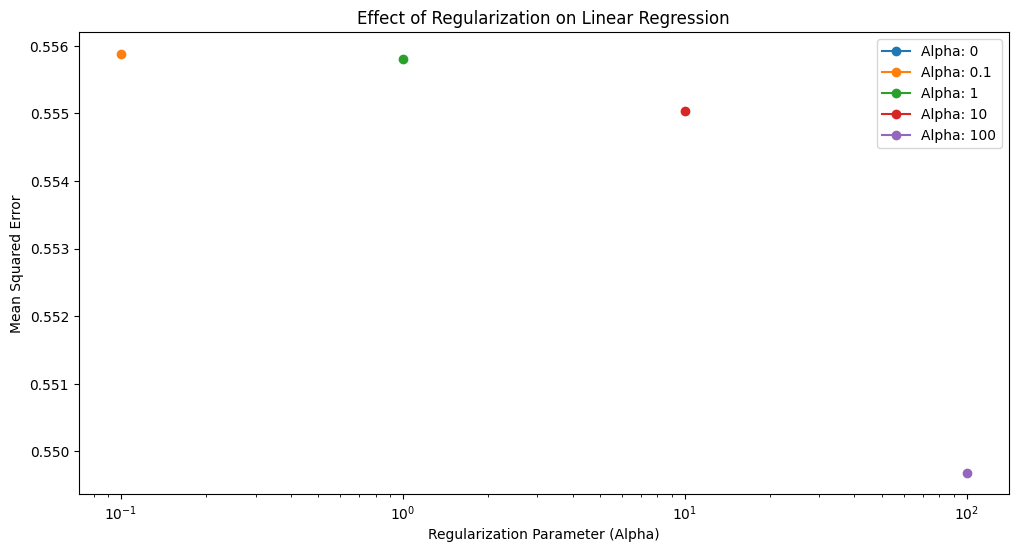

In [4]:
# Experiment with different regularization parameters
alphas = [0, 0.1, 1, 10, 100]

fig, ax = plt.subplots(figsize=(12, 6))

for alpha in alphas:
    # Implement Linear Regression with Ridge/Lasso regularization
    if alpha == 0:
        reg = LinearRegression()
    elif alpha > 0:
        reg = Ridge(alpha=alpha)
        # reg = Lasso(alpha=alpha)
    
    reg.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Alpha: {alpha}, MSE: {mse:.2f}")
    
    # Plot the results
    ax.plot(alpha, mse, 'o-', label=f"Alpha: {alpha}")

ax.set_xlabel('Regularization Parameter (Alpha)')
ax.set_ylabel('Mean Squared Error')
ax.set_xscale('log')
ax.set_title('Effect of Regularization on Linear Regression')
ax.legend()
plt.show()

In [5]:
# Implement Logistic Regression for classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = iris.target

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train a Logistic Regression model
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Evaluate the Logistic Regression model
y_pred = lr_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.90


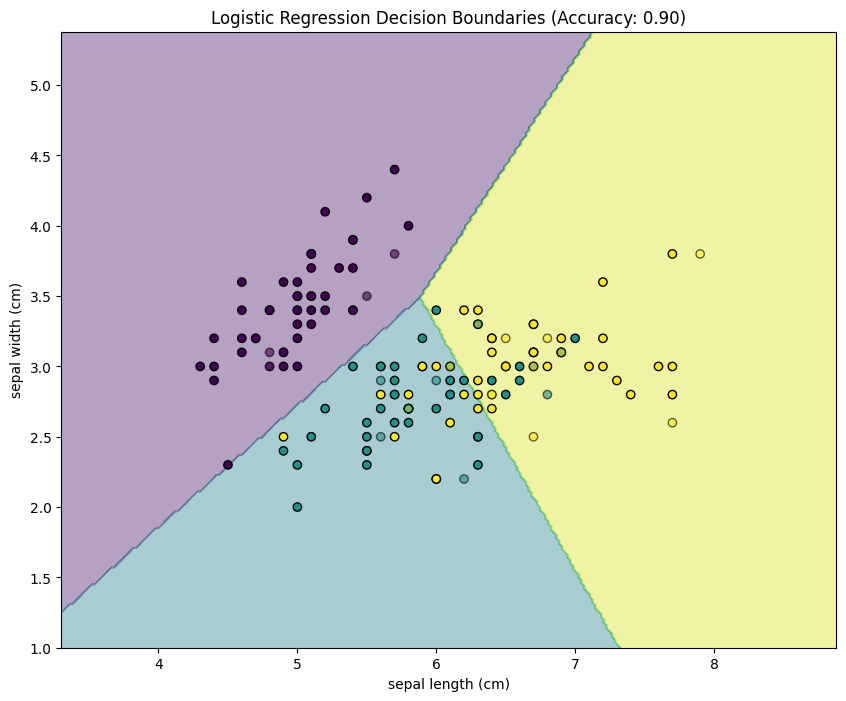

In [10]:
# Visualize the decision boundaries
plt.figure(figsize=(10, 8))

# Create a mesh grid
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Classify the mesh grid
Z = lr_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap='viridis')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='viridis', alpha=0.6)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"Logistic Regression Decision Boundaries (Accuracy: {accuracy:.2f})")
plt.show()